### Summarizing Data

In [21]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('colleges_train.csv')

print("Size:")
print(df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nSummary:")
print(df.describe())
print("\nData types:")
print(df.dtypes)

Size:
(400, 44)

First 5 rows:
                             name state  adm_rate  satv25  satv50  satv75  \
0             Sweet Briar College    VA      0.79     540     585     630   
1                   Salem College    NC      0.80     460     520     580   
2                Barry University    FL      0.51     480     515     550   
3  Texas A&M University-Texarkana    TX      0.94     480     530     580   
4           Blue Mountain College    MS      0.96     450     510     570   

   satm25  satm50  satm75  pell_grant_rate  ...  arch_deg  agri_deg  hist_deg  \
0     470     525     580           0.3065  ...       0.0       0.0    0.0385   
1     450     505     560           0.5469  ...       0.0       0.0    0.0455   
2     450     490     530           0.4832  ...       0.0       0.0    0.0000   
3     490     530     570           0.5153  ...       0.0       0.0    0.0377   
4     590     595     600           0.4865  ...       0.0       0.0    0.0692   

   socialsci_deg  h

### Visualizing Data

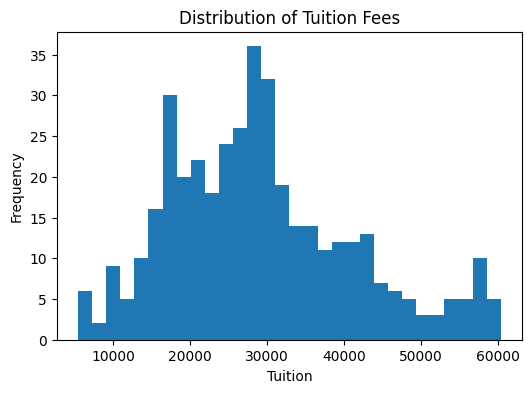

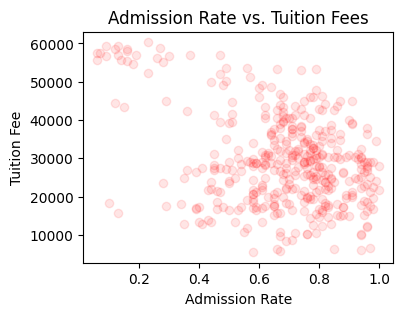

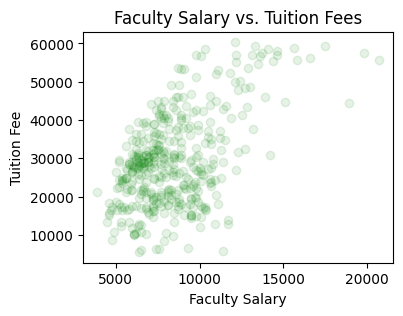

KeyError: 'ft faculty rate'

In [37]:
#Distribution of Tuition Fees
df['tuition'].hist(bins=30, figsize=(6,4))
plt.title('Distribution of Tuition Fees')
plt.grid(False)
plt.xlabel('Tuition')
plt.ylabel('Frequency')
plt.show()

# Scatter plots
plt.scatter(df['adm_rate'], df['tuition'], alpha=0.1, color='red')
plt.xlabel('Admission Rate')
plt.ylabel('Tuition Fee')
plt.title('Admission Rate vs. Tuition Fees')
plt.gcf().set_size_inches(4, 3)
plt.show()

plt.scatter(df['faculty_salary'], df['tuition'], alpha=0.1, color='green')
plt.xlabel('Faculty Salary')
plt.ylabel('Tuition Fee')
plt.title('Faculty Salary vs. Tuition Fees')
plt.gcf().set_size_inches(4, 3)
plt.show()

plt.scatter(df['ft faculty rate'], df['tuition'], alpha=0.1, color='green')
plt.xlabel('FT Faculty Rate')
plt.ylabel('Tuition Fee')
plt.title('FT Faculty Rate vs. Tuition Fees')
plt.gcf().set_size_inches(4, 3)
plt.show()

plt.scatter(df['ug'], df['tuition'], alpha=0.1, color='green')
plt.xlabel('Number of Undergraduate Students')
plt.ylabel('Tuition Fee')
plt.title('Number of Undergraduate Students vs. Tuition Fees')
plt.gcf().set_size_inches(4, 3)
plt.show()

#Correlation matrix for any numerical features
df_numeric = df.select_dtypes(include=[np.number])
correlation_matrix = df_numeric.corr()
print(correlation_matrix['tuition'].sort_values(ascending=False))



### Additional Scatterplots of Interest

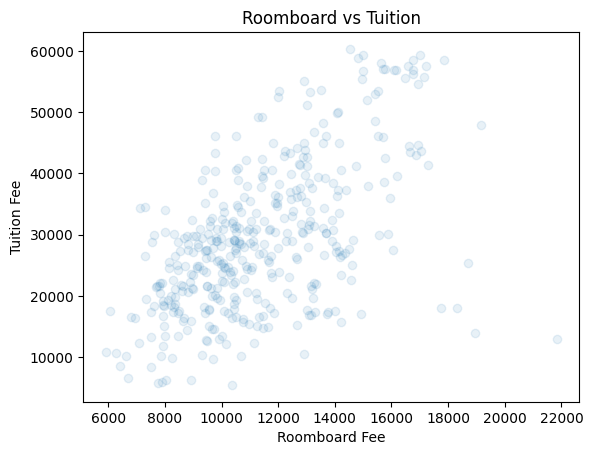

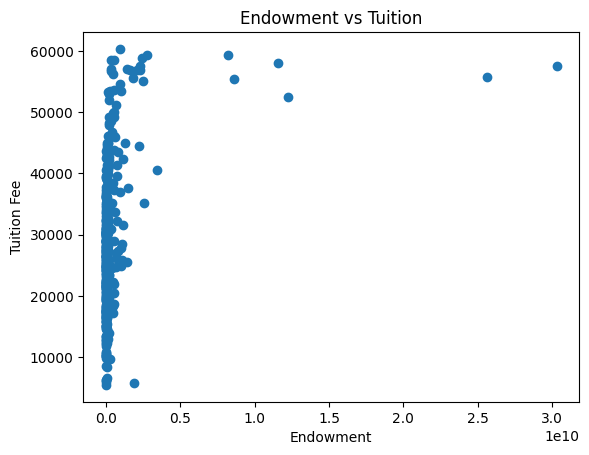

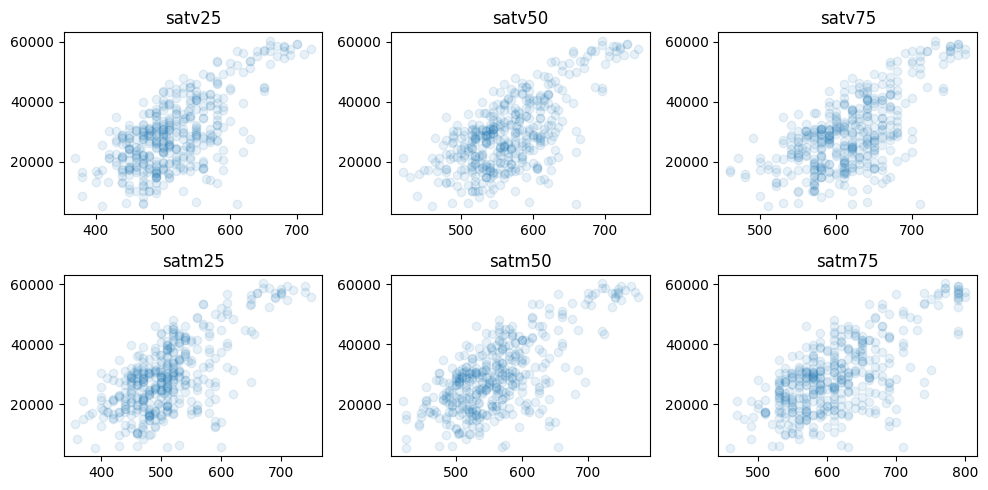

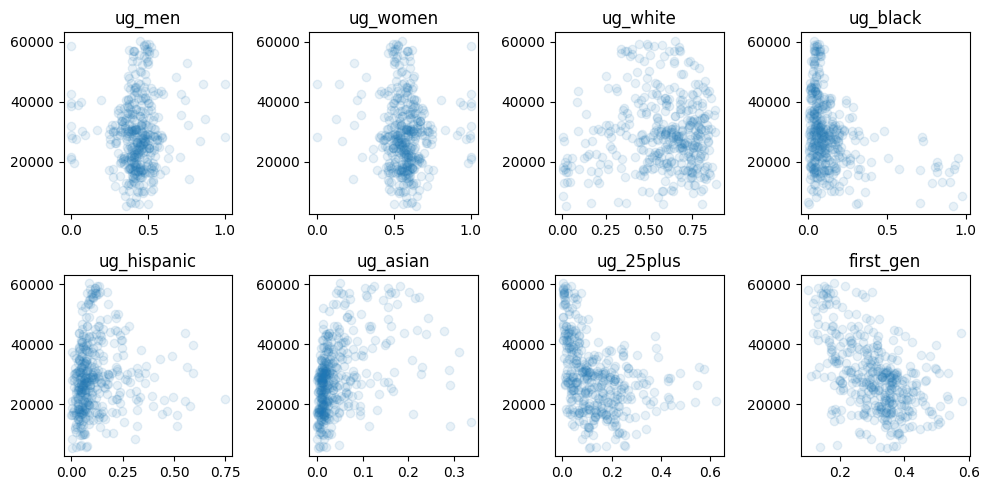

In [36]:
plt.figure()
plt.scatter(df['roomboard'],df['tuition'],alpha=0.1)
plt.xlabel('Roomboard Fee')
plt.ylabel('Tuition Fee')
plt.title('Roomboard vs Tuition')
plt.show()

plt.figure()
plt.scatter(df['endowment'],df['tuition'])
plt.xlabel('Endowment')
plt.ylabel('Tuition Fee')
plt.title('Endowment vs Tuition')
plt.show()

fig, axs = plt.subplots(2,3,figsize=(10,5))

axs[0,0].scatter(df['satv25'],df['tuition'], alpha=0.1)
axs[0,0].set_title('satv25')

axs[0,1].scatter(df['satv50'],df['tuition'], alpha=0.1)
axs[0,1].set_title('satv50')

axs[0,2].scatter(df['satv75'],df['tuition'], alpha=0.1)
axs[0,2].set_title('satv75')

axs[1,0].scatter(df['satm25'],df['tuition'], alpha=0.1)
axs[1,0].set_title('satm25')

axs[1,1].scatter(df['satm50'],df['tuition'], alpha=0.1)
axs[1,1].set_title('satm50')

axs[1,2].scatter(df['satm75'],df['tuition'], alpha=0.1)
axs[1,2].set_title('satm75')

plt.tight_layout()
plt.show()

fig, axs = plt.subplots(2,4,figsize=(10,5))

axs[0,0].scatter(df['ug_men'],df['tuition'], alpha=0.1)
axs[0,0].set_title('ug_men')

axs[0,1].scatter(df['ug_women'],df['tuition'], alpha=0.1)
axs[0,1].set_title('ug_women')

axs[0,2].scatter(df['ug_white'],df['tuition'], alpha=0.1)
axs[0,2].set_title('ug_white')

axs[0,3].scatter(df['ug_black'],df['tuition'], alpha=0.1)
axs[0,3].set_title('ug_black')

axs[1,0].scatter(df['ug_hispanic'],df['tuition'], alpha=0.1)
axs[1,0].set_title('ug_hispanic')

axs[1,1].scatter(df['ug_asian'],df['tuition'], alpha=0.1)
axs[1,1].set_title('ug_asian')

axs[1,2].scatter(df['ug_25plus'],df['tuition'], alpha=0.1)
axs[1,2].set_title('ug_25plus')

axs[1,3].scatter(df['first_gen'],df['tuition'], alpha=0.1)
axs[1,3].set_title('first_gen')

plt.tight_layout()
plt.show()

### Bootstrap 95% Confidence Interval for Tuition

In [ ]:
def bootstrap_conf_interval(data, n_bootstrap=1000):
    bootstrap_samples = np.random.choice(data, size=(n_bootstrap, len(data)))
    means = np.mean(bootstrap_samples, axis=1)
    conf_interval = np.percentile(means, [2.5, 97.5])
    return conf_interval

tuition_fees = df['tuition'].values
conf_interval = bootstrap_conf_interval(tuition_fees)
print(f"95% confidence interval for  mean tuition fee: {conf_interval}")

95% confidence interval for  mean tuition fee: [28161.2560625 30502.4083125]


### Baseline Linear Regression Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

#Baseline model using LR / need to check for multicollinearity esp for sat scores

#List of features used / should test features first
features = ['faculty_salary', 'satv50', 'satm50','roomboard','first_gen','adm_rate','socialsci_deg']
X = df[features]
y = df['tuition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Creating the model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

#Predicting the tuition fees for the test set
y_pred = linreg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

#Calculating the RMSE
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
#Calculating the baseline RMSE
baseline_rmse = np.sqrt(mean_squared_error(y_test, [y_train.mean()] * len(y_test)))

print(f"Test RMSE of linear regression: {test_rmse:.3f}   Baseline RMSE: {baseline_rmse:.3f}")

#Calculating R-squared for the test set
r_squared = 1 - (test_rmse ** 2) / (baseline_rmse ** 2)
print(f"Test R-squared of linear regression: {r_squared:.3f}")

# Cross-validate to check for overfitting and underfitting
cv_scores_linreg = cross_val_score(linreg, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse_linreg = np.sqrt(-cv_scores_linreg)




print("Cross-validated RMSE scores:", cv_rmse_linreg)
print("Mean CV RMSE:", cv_rmse_linreg.mean())
# print(f"Prediction interval Coverage: {lin_cover} \t Width: {lin_width}")


Mean Squared Error: 50831342.99397808
Test RMSE of linear regression: 7129.610   Baseline RMSE: 13319.394
Test R-squared of linear regression: 0.713
Cross-validated RMSE scores: [8107.80094271 8438.22717979 7816.76850395 8585.24420067 7904.75149119]
Mean CV RMSE: 8170.558463661076


Implementing Ridge Regression to Predict Tuition Fees

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import numpy as np

# Initialize the Ridge Regression model
ridge = Ridge(alpha=1.0)

# Fit the model on the training data
ridge.fit(X_train, y_train)

# Predict on the training set to see in-sample performance
y_train_pred_ridge = ridge.predict(X_train)

# Predict on the test set
y_test_pred_ridge = ridge.predict(X_test)

# Evaluate the model using RMSE
train_rmse_ridge = np.sqrt(mean_squared_error(y_train, y_train_pred_ridge))
test_rmse_ridge = np.sqrt(mean_squared_error(y_test, y_test_pred_ridge))

print(f"Training RMSE: {train_rmse_ridge:.3f}")
print(f"Test RMSE: {test_rmse_ridge:.3f}")

# Cross-validate to check for overfitting and underfitting
cv_scores_ridge = cross_val_score(ridge, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse_ridge = np.sqrt(-cv_scores_ridge)

print("Cross-validated RMSE scores:", cv_rmse_ridge)
print("Mean CV RMSE:", cv_rmse_ridge.mean())


Training RMSE: 8157.777
Test RMSE: 7159.067
Cross-validated RMSE scores: [8103.86696731 8404.64052489 7525.90128589 8792.02942359 8048.79396331]
Mean CV RMSE: 8175.046432996986


Random Forest Regression for Enhanced Tuition Fee Prediction

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize the Random Forest model
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
random_forest.fit(X_train, y_train)

# Predict on the training set and test set
y_train_pred_rf = random_forest.predict(X_train)
y_test_pred_rf = random_forest.predict(X_test)

# Evaluate the model using RMSE
train_rmse_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
test_rmse_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))

print(f"Training RMSE: {train_rmse_rf:.3f}")
print(f"Test RMSE: {test_rmse_rf:.3f}")

# Optionally, examine feature importance
feature_importances = random_forest.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)
print(importance_df)


Training RMSE: 2970.072
Test RMSE: 6718.542
          Feature  Importance
1          satv50    0.222851
2          satm50    0.215529
3       roomboard    0.181156
4       first_gen    0.173238
0  faculty_salary    0.074998
6   socialsci_deg    0.068179
5        adm_rate    0.064050


Quantile Regression for Predicting Lower and Upper Tuition Fee Bounds

In [25]:
import statsmodels.formula.api as smf

# Creating a formula for the quantile regression model
formula = 'tuition ~ adm_rate + faculty_salary + satv50 + satm50 + roomboard + first_gen'

# Fit the 10th percentile
model_q10 = smf.quantreg(formula, df)
res_q10 = model_q10.fit(q=0.1)
print("10th Percentile Quantile Regression Results:")
print(res_q10.summary())

# Fit the 90th percentile
model_q90 = smf.quantreg(formula, df)
res_q90 = model_q90.fit(q=0.9)
print("90th Percentile Quantile Regression Results:")
print(res_q90.summary())


10th Percentile Quantile Regression Results:
                         QuantReg Regression Results                          
Dep. Variable:                tuition   Pseudo R-squared:              0.08477
Model:                       QuantReg   Bandwidth:                       4954.
Method:                 Least Squares   Sparsity:                    3.912e+04
Date:                Wed, 24 Apr 2024   No. Observations:                  400
Time:                        21:39:26   Df Residuals:                      393
                                        Df Model:                            6
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -9568.9859   1.71e+04     -0.560      0.576   -4.32e+04    2.41e+04
adm_rate       -8543.2297   4697.336     -1.819      0.070   -1.78e+04     691.821
faculty_salary    -0.3216      0.509     -0.632      0.528      -1.322

c:\Users\varun\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
c:\Users\varun\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +


Final Validation and Preparation for Project Submission

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4, 5, 6, 7, 8],
    'criterion': ['squared_error', 'absolute_error']  # Updated criterion names
}

# Create the grid search model
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters and RMSE
best_params = grid_search.best_params_
best_rmse = np.sqrt(-grid_search.best_score_)

print("Best parameters:", best_params)
print("Best RMSE:", best_rmse)


Fitting 3 folds for each of 90 candidates, totalling 270 fits
[CV] END criterion=squared_error, max_depth=4, max_features=auto, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, max_depth=4, max_features=auto, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, max_depth=4, max_features=auto, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, max_depth=4, max_features=auto, n_estimators=200; total time=   0.0s
[CV] END criterion=squared_error, max_depth=4, max_features=auto, n_estimators=200; total time=   0.0s
[CV] END criterion=squared_error, max_depth=4, max_features=auto, n_estimators=200; total time=   0.0s
[CV] END criterion=squared_error, max_depth=4, max_features=auto, n_estimators=300; total time=   0.0s
[CV] END criterion=squared_error, max_depth=4, max_features=auto, n_estimators=300; total time=   0.0s
[CV] END criterion=squared_error, max_depth=4, max_features=auto, n_estimators=300; total time=   0.0s
[CV] END cr

c:\Users\varun\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
90 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\varun\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\varun\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\varun\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.p

Best parameters: {'criterion': 'absolute_error', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 200}
Best RMSE: 7941.822843889685


Evaluating the Optimized Random Forest Model on Test Data

In [27]:
# Initialize the Random Forest model with the best parameters
optimized_rf = RandomForestRegressor(
    criterion='absolute_error',
    max_depth=5,
    max_features='sqrt',
    n_estimators=200,
    random_state=42
)

# Fit the model on the training data
optimized_rf.fit(X_train, y_train)

# Predict on the test set
y_test_pred_optimized = optimized_rf.predict(X_test)

# Evaluate the model using RMSE
optimized_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_optimized))

print(f"Optimized Random Forest Test RMSE: {optimized_test_rmse:.2f}")


Optimized Random Forest Test RMSE: 7370.79


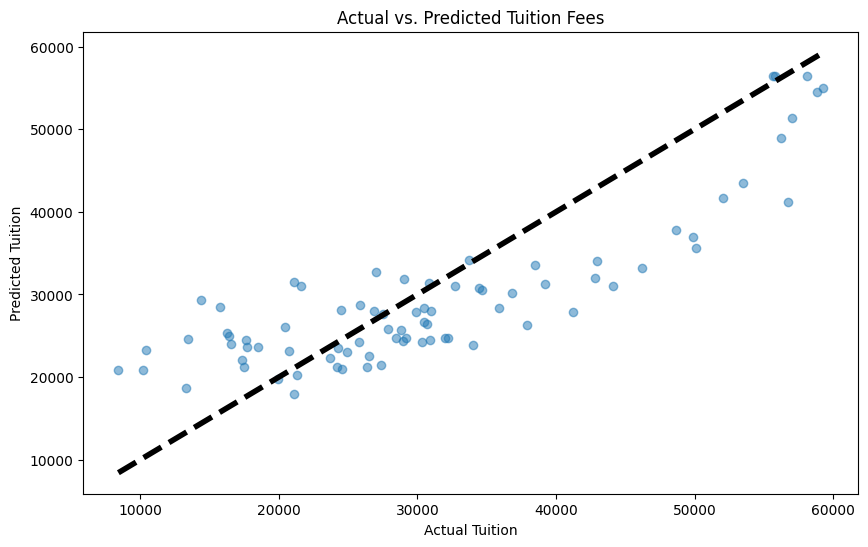

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_optimized, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual Tuition')
plt.ylabel('Predicted Tuition')
plt.title('Actual vs. Predicted Tuition Fees')
plt.show()


### Generate Test Predictions

In [35]:
test_df = pd.read_csv('colleges_test_features.csv')

# Select features in the trained model
features = ['faculty_salary', 'satv50', 'satm50', 'roomboard', 'first_gen', 'adm_rate', 'socialsci_deg']
X_test = test_df[features]

predicted_tuition = optimized_rf.predict(X_test)

formula = 'tuition ~ faculty_salary + satv50 + satm50 + roomboard + first_gen + adm_rate + socialsci_deg'

# Quantile Regression for interval
model_q10 = smf.quantreg(formula, df)
res_q10 = model_q10.fit(q=0.1)
model_q90 = smf.quantreg(formula, df)
res_q90 = model_q90.fit(q=0.9)

quantile_10 = res_q10.predict(test_df)
quantile_90 = res_q90.predict(test_df)

predictions_df = pd.DataFrame({
    'Predicted Tuition': predicted_tuition,
    '10% Quantile': quantile_10,
    '90% Quantile': quantile_90
})

# Output predictions
predictions_df.to_csv('tuition_predictions.csv', index=False)




c:\Users\varun\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
c:\Users\varun\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
